# **DA5401 ASSIGNMENT-7** 
#### Author: *Vishwanath Vinod* (EE22B002)
#### Date:   30th October 2025

#### **IMPORTS**

In [44]:
import os
import ast
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,mean_squared_error,roc_auc_score,roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split,cross_val_score
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from ucimlrepo import fetch_ucirepo
import seaborn as sns
sns.set_style('darkgrid')

## MODELS ##
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## **A. DATASET PREPARATION AND BASELINE**

#### **A1. LOAD AND PREPARE DATASET**

In [45]:
statlog_landsat_satellite = fetch_ucirepo(id=146)

X = statlog_landsat_satellite.data.features

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y = statlog_landsat_satellite.data.targets
df = pd.concat([X_scaled, y], axis=1)
print(df.columns)
print(df.head())

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'class'],
      dtype='object')
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0    1.661177    1.372574    1.244208    0.603682    1.095101    0.819608   
1    1.073150    0.804404    0.403097   -0.190128    1.095101    0.819608   
2    1.073150    0.804404    0.162779    0.021555    0.800119    0.819608   
3    0.779136    0.804404    0.162779   -0.190128    1.095101    0

#### **A2. TRAIN AND TEST DATA**

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
unique, counts = np.unique(Y_test, return_counts=True)
print(dict(zip(unique, counts)))

{1: 307, 2: 141, 3: 272, 4: 125, 5: 141, 7: 301}


#### **A3. TRAIN ALL MODELS**

In [51]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [52]:
models = {
    "Dummy": DummyClassifier(strategy="prior"),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(probability=True, random_state=42)
}
Y_train = Y_train.values.ravel()
for name, model in models.items():
    model.fit(X_train, Y_train)
    print(f"{name} model trained successfully.")

Dummy model trained successfully.
KNN model trained successfully.
DecisionTree model trained successfully.
LogisticRegression model trained successfully.
GaussianNB model trained successfully.
SVC model trained successfully.


#### **A4. BASELINE EVALUATION**

In [54]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
predicted_probs = {}
for name, model in models.items():
    
    Y_pred = model.predict(X_test)
    predicted_probs[name] = model.predict_proba(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))
    precisions.append(precision_score(Y_test, Y_pred, average='macro',zero_division=0))
    recalls.append(recall_score(Y_test, Y_pred, average='macro',zero_division=0))
    f1_scores.append(f1_score(Y_test, Y_pred, average='macro',zero_division=0))

| Model               | Accuracy | Precision | Recall | F1 Score |
|----------------------|-----------|------------|---------|-----------|
| Dummy                | 0.2385    | 0.0398     | 0.1667  | 0.0642    |
| KNN                  | 0.9075    | 0.8973     | 0.8850  | 0.8901    |
| Decision Tree        | 0.8462    | 0.8222     | 0.8205  | 0.8212    |
| Logistic Regression  | 0.7988    | 0.7716     | 0.7368  | 0.7322    |
| Gaussian NB          | 0.7832    | 0.7676     | 0.7710  | 0.7645    |
| SVC                  | 0.8912    | 0.8784     | 0.8646  | 0.8702    |

**OBSERVATIONS**

- Dummy classifier performs the worst among all models in terms of all metrics (Precision, Accuracy, F1-score and Recall).
- KNN based classifier performs the best among all models in termss of all metrics (Precision, Accuracy, F1-score and Recall).

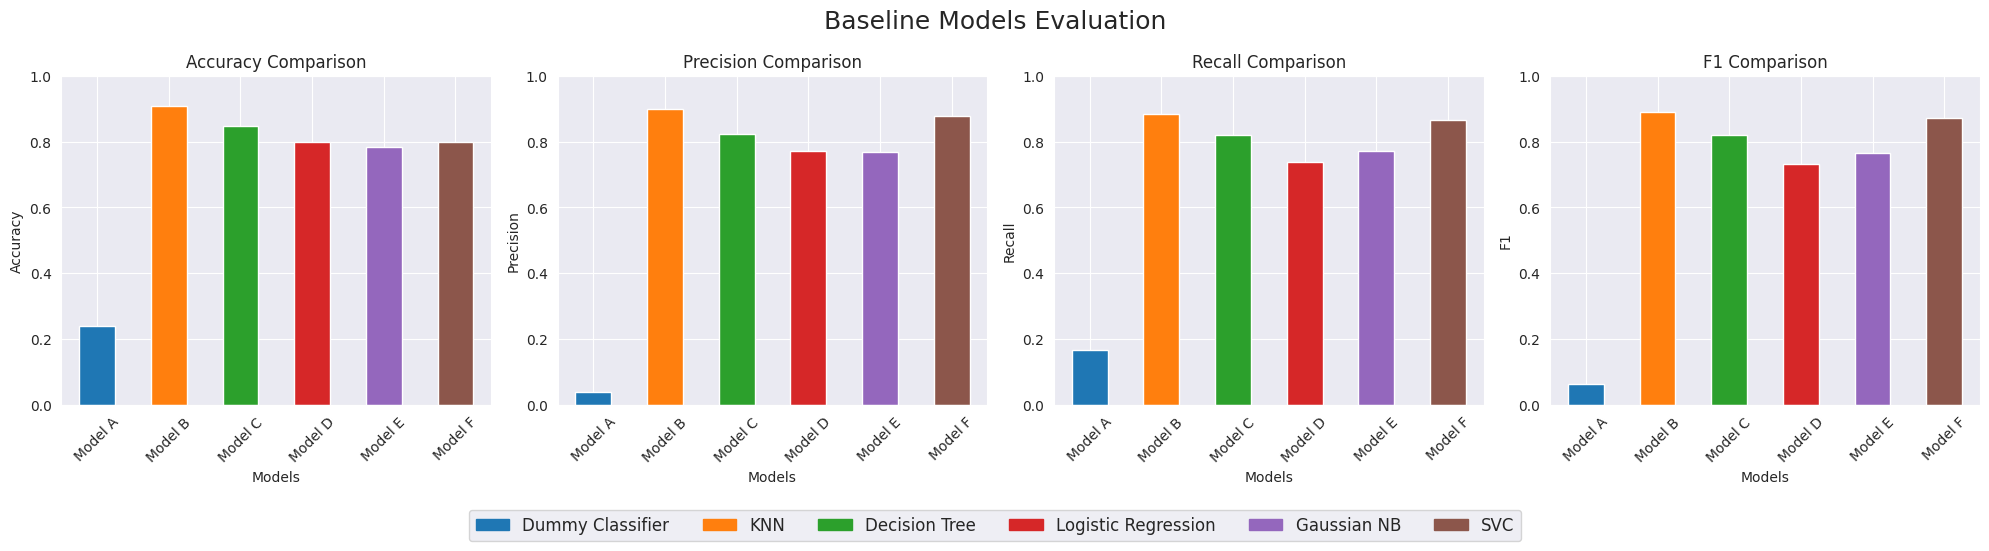

In [55]:
results_df = pd.DataFrame({
    'Model A': [accuracies[0], precisions[0], recalls[0], f1_scores[0]],
    'Model B': [accuracies[1], precisions[1], recalls[1], f1_scores[1]],
    'Model C': [accuracies[2], precisions[2], recalls[2], f1_scores[2]],
    'Model D': [accuracies[3], precisions[3], recalls[3], f1_scores[3]],
    'Model E': [accuracies[4], precisions[4], recalls[4], f1_scores[4]],
    'Model F': [accuracies[3], precisions[5], recalls[5], f1_scores[5]]
}, index=['Accuracy', 'Precision', 'Recall', 'F1'])

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    results_df.loc[metric].plot(kind='bar', ax=axes[i], color=['C0', 'C1', 'C2', 'C3','C4','C5'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Models')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0.0,1.0)

fig.suptitle('Baseline Models Evaluation', fontsize=18)
patches = [
    mpatches.Patch(color='C0', label='Dummy Classifier'),
    mpatches.Patch(color='C1', label='KNN'),
    mpatches.Patch(color='C2', label='Decision Tree'),
    mpatches.Patch(color='C3', label='Logistic Regression'),
    mpatches.Patch(color='C4', label='Gaussian NB'),
    mpatches.Patch(color='C5', label='SVC')
]
fig.legend(handles=patches, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.1), fontsize=12)
plt.tight_layout()
plt.show()


## **B. ROC ANALYSIS FOR MODEL SELECTION**

#### **B1. MULTI-CLASS ROC CALCULATION**

- For a binary classifier, the Receiver Operating Characteristic (ROC) curve plots: True Positive Rate (TPR) vs False Positive Rate (FPR)
as the discrimination threshold varies.
- The Area Under the ROC Curve (AUC) measures how well the model distinguishes between the two classes 
(AUC = 1.0 → perfect classifier, AUC = 0.5 → random guessing).

- In a multi-class setting, ROC analysis is commonly performed using the One-vs-Rest (OvR) approach. Each class is treated as the positive class, while all other classes combined are treated as the negative class.

    - For every class i, a separate binary ROC curve is computed using its predicted probabilities versus all others. The AUC for each class reflects how well the model distinguishes samples of that class from the rest.

    - To obtain an overall measure of performance, these per-class AUC values are then aggregated using either:

        - Macro-average AUC → unweighted mean across all classes (treats all classes equally), or
        - Weighted-average AUC → weighted by each class’s support (reflects the dataset’s class distribution).

This OvR AUC evaluation allows fair comparison across multi-class models by summarizing their ability to correctly rank the true class higher than the others for each instance.

In [56]:
y_test_bin = label_binarize(Y_test, classes=[1,2,3,4,5,7])
macro_auc = {}
weighted_auc = {}
for name,model in models.items():
    macro_auc[name] = roc_auc_score(y_test_bin, predicted_probs[name], average="macro", multi_class="ovr")
    print("Model", name,"Macro AUC (OvR):", macro_auc[name])
    weighted_auc[name] = roc_auc_score(y_test_bin, predicted_probs[name], average="weighted", multi_class="ovr")
    print("Model", name,"Weighted AUC (OvR):", macro_auc[name])

Model Dummy Macro AUC (OvR): 0.5
Model Dummy Weighted AUC (OvR): 0.5
Model KNN Macro AUC (OvR): 0.9800230084441534
Model KNN Weighted AUC (OvR): 0.9800230084441534
Model DecisionTree Macro AUC (OvR): 0.8948020332625144
Model DecisionTree Weighted AUC (OvR): 0.8948020332625144
Model LogisticRegression Macro AUC (OvR): 0.9521210655297591
Model LogisticRegression Weighted AUC (OvR): 0.9521210655297591
Model GaussianNB Macro AUC (OvR): 0.9472986288895363
Model GaussianNB Weighted AUC (OvR): 0.9472986288895363
Model SVC Macro AUC (OvR): 0.9802622224113143
Model SVC Weighted AUC (OvR): 0.9802622224113143


#### **B2. PLOTTING ROC**

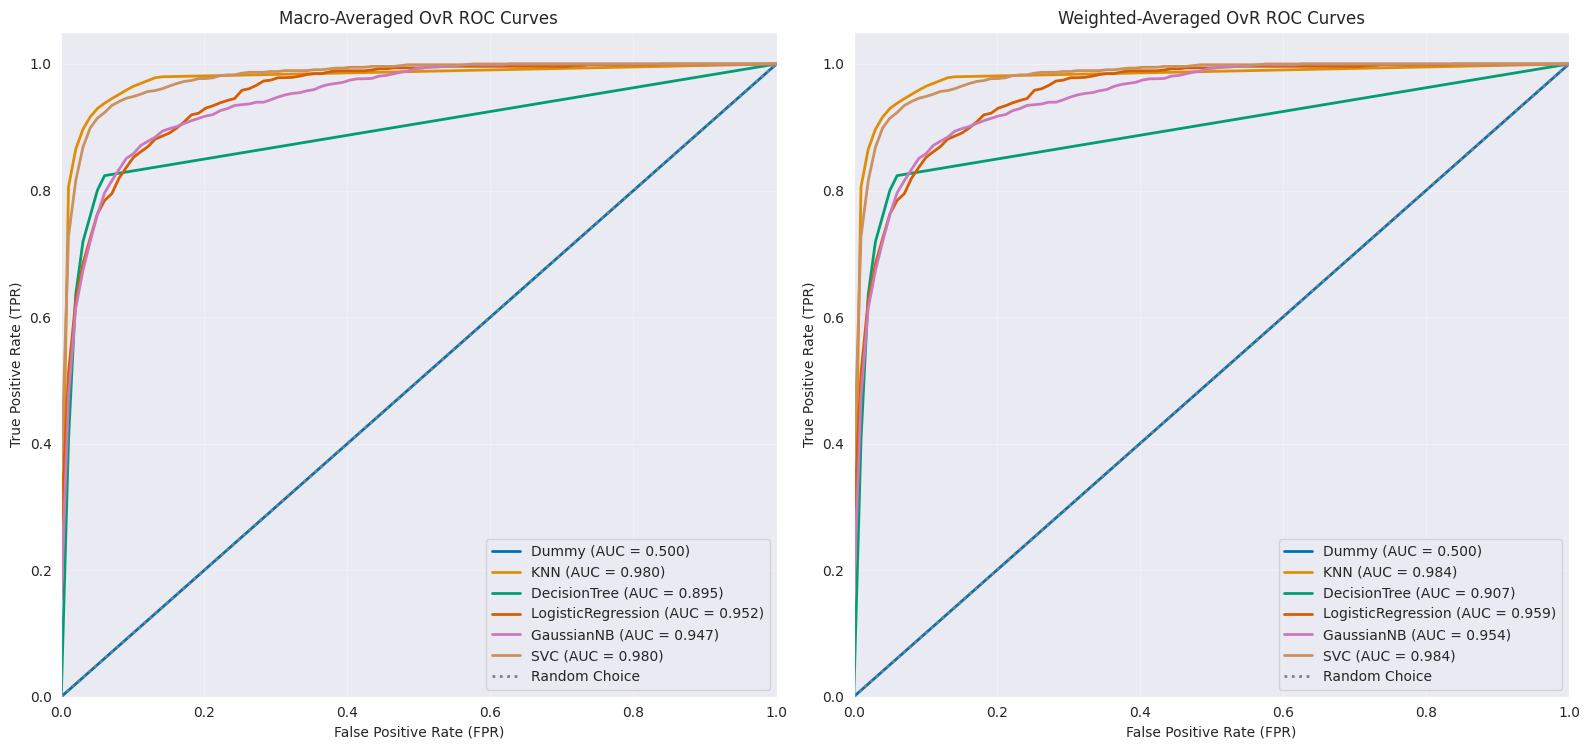

In [57]:
y_test_bin = label_binarize(Y_test, classes=[1, 2, 3, 4, 5, 7])
n_classes = y_test_bin.shape[1]

colors = sns.color_palette("colorblind", len(models) + 3)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

averages = ['macro', 'weighted']
titles = ['Macro-Averaged OvR ROC Curves', 'Weighted-Averaged OvR ROC Curves']

for ax, avg, title in zip(axes, averages, titles):
    for idx, (name, model) in enumerate(models.items()):
        fpr = dict()
        tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probs[name][:, i])

        # Interpolate mean TPR
        all_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes

        auc_value = roc_auc_score(
            y_test_bin, predicted_probs[name],
            average=avg, multi_class="ovr"
        )

        ax.plot(all_fpr, mean_tpr, lw=2, color=colors[idx],
                label=f'{name} (AUC = {auc_value:.3f})')

    # Random baseline
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle=':',
            label='Random Choice')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(title)
    ax.grid(alpha=0.3)

    # Add legend below each subplot
    ax.legend(loc='lower right')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


| Model               | Macro-Average AUC | Weighted-Average AUC |
|----------------------|-----------|-----------|
| Dummy                | 0.500   | 0.500
| KNN                  | 0.980    | 0.984
| Decision Tree        | 0.895   | 0.907
| Logistic Regression  | 0.952    | 0.959
| Gaussian NB          | 0.947    | 0.954
| SVC                  | 0.980    | 0.984

#### **B3. ROC Interpretation**

- **HIGHEST MACRO-AVERAGED AUC MODEL** : 
    - The model with the highest Macro-averaged AUC demonstrates the best overall discriminative capability across all classes. A higher AUC indicates that the model ranks positive samples higher than negative ones more consistently. 

    - Conceptually, an AUC of:
        - 1.0 → perfect separation between classes,
        - 0.5 → no discrimination (random predictions),
        - < 0.5 → systematic misclassification — the model is more confident about the wrong class.
    - Hence, the model with the largest macro-averaged AUC can be considered the most robust and generalizable classifier among the six.
    - KNN classifier has the highest Macro-averaged AUC (0.98) among all models.

- **<0.5 MACRO-AVERAGED AUC MODEL** : 
    - A model with an AUC below 0.5 performs worse than random guessing. (in the OvR case)
    - None of the above models has an AUC <0.5. All of them perfrom better than random guessing.

## **C. PRC ANALYSIS**

#### **C1. PRC CALCULATION**

- ROC curves plot the True Positive Rate (TPR) against the False Positive Rate (FPR). However, when the dataset is highly imbalanced, the large number of negative samples can keep the FPR deceptively low — even if many negatives are misclassified. This makes the ROC curve appear overly optimistic and less sensitive to performance variations on the minority class.

- Precision–Recall Curves (PRCs), in contrast, focus solely on the positive (minority) class, plotting Precision (the proportion of predicted positives that are correct) against Recall (the proportion of actual positives identified). This makes PRC more sensitive to performance changes on the minority class, which is typically the class of interest in imbalanced problems.

- Even though the imbalance in the UCI Landsat dataset is moderate, PRC analysis provides a more reliable and interpretable assessment of each model’s effectiveness in distinguishing rare or difficult terrain types, ensuring that performance on less frequent classes is not overshadowed by the dominant ones.

#### **C2. PLOTTING PRCs**

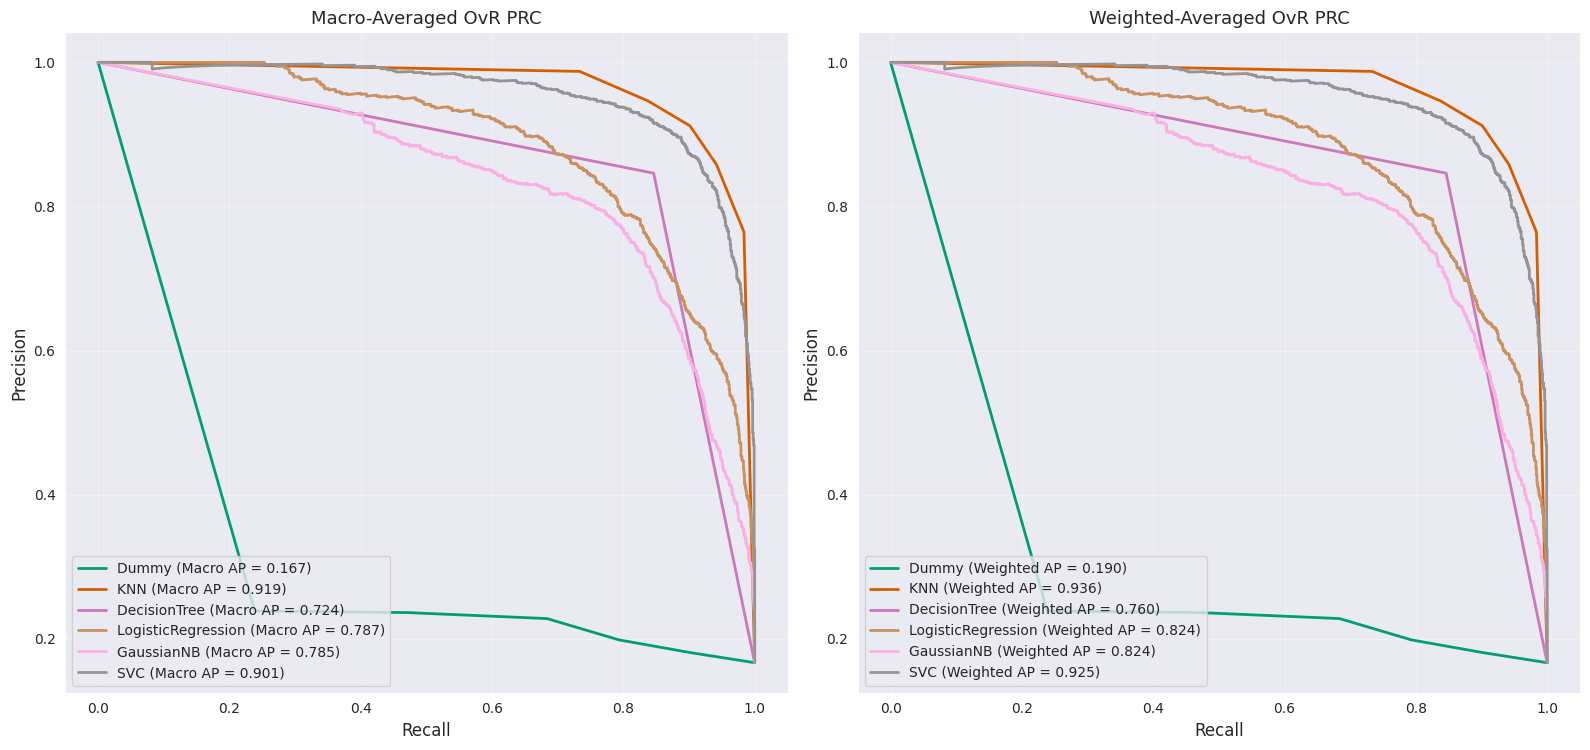

In [58]:
from sklearn.metrics import precision_recall_curve, average_precision_score

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
averages = ["macro", "weighted"]
titles = ["Macro-Averaged OvR PRC", "Weighted-Averaged OvR PRC"]

for ax, avg, title in zip(axes, averages, titles):
    for idx, (name, model) in enumerate(models.items()):
        # Compute per-class PRC
        precision = dict()
        recall = dict()
        ap_scores = []

        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(
                y_test_bin[:, i], predicted_probs[name][:, i]
            )
            ap_i = average_precision_score(
                y_test_bin[:, i], predicted_probs[name][:, i]
            )
            ap_scores.append(ap_i)

        # Macro/Weighted average precision
        ap_avg = average_precision_score(
            y_test_bin, predicted_probs[name], average=avg
        )

        # Flatten predictions for a smooth overall curve (visualization only)
        precision_avg, recall_avg, _ = precision_recall_curve(
            y_test_bin.ravel(), predicted_probs[name].ravel()
        )

        # Plot averaged PRC
        ax.plot(
            recall_avg,
            precision_avg,
            lw=2,
            color=colors[idx + 2],
            label=f"{name} ({avg.capitalize()} AP = {ap_avg:.3f})",
        )

    ax.set_xlabel("Recall", fontsize=12)
    ax.set_ylabel("Precision", fontsize=12)
    ax.set_title(title, fontsize=13)
    ax.grid(alpha=0.3)

    ax.legend(loc='lower left')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


#### **C3. PRC INTERPRETATION**



| Model               | Macro-Average Precision | Weighted-Average Precision |
|----------------------|-----------|-----------|
| Dummy                | 0.167   | 0.190 |
| KNN                  | 0.919    | 0.936 |
| Decision Tree        | 0.724    | 0.760 |
| Logistic Regression  | 0.787    | 0.824 |
| Gaussian NB          | 0.785    | 0.824 |
| SVC                  | 0.901    | 0.925 |

- KNN model has the highest Average Precision across all classes. For well-performing models, most of the high-confidence positive predictions are truly positive, so precision stays high even as recall increases gradually.
- The worst-performing model's (Dummy Classifier) PRC typically shows a sharp drop in precision as recall increases. 
- Reasons for sharp drop:
    - The model’s predicted probabilities for positive and negative samples overlap significantly — it cannot clearly distinguish between the two classes.
    - As the threshold is lowered to capture more positives (increasing recall), a large number of false positives are also included, drastically reducing precision.

## **D. FINAL RECCOMENDATION**

#### **D1. SYNTHESIS**


| Model               | Macro-Average Precision |Macro-Average AUC |F1 Score |
|----------------------|-----------|-----------|-----------|
| Dummy                | 0.167   | 0.500| 0.0642    |
| KNN                  | 0.919    | 0.980 |0.8901    |
| Decision Tree        | 0.724    | 0.895 | 0.8212    |
| Logistic Regression  | 0.787    | 0.952 | 0.7322    |
| Gaussian NB          | 0.785    | 0.947 | 0.7645    |
| SVC                  | 0.901    | 0.980 | 0.8702    |

 **RANKINGS**

- F1-Score: KNN > SVC > Decision Tree > Gaussian NB > Logistic Regression > Dummy

- ROC-AUC: KNN ≈ SVC > Logistic Regression > Gaussian NB > Decision Tree > Dummy

- PRC-AP: KNN > SVC > Logistic Regression > Gaussian NB > Decision Tree > Dummy

**OBSERVATIONS**

- KNN and SVC consistently rank at the top across all three metrics, indicating strong overall performance in both general class separation and positive-class identification. Dummy classifier performs worst in every metric, as expected.

- Decision Tree has a higher F1 (0.8212) than Logistic Regression (0.7322), but its Macro-AUC (0.895) and PRC-AP (0.724) are lower.
This indicates that while Decision Tree predicts positives with reasonable balance between precision and recall for the test set, it struggles to separate classes globally, and its precision on minority classes is lower.

- Logistic Regression has a high Macro-AUC (0.952) but lower F1 (0.7322). This shows that the model ranks positives correctly overall (good separability), but it may produce more false positives when operating at the default threshold, reducing precision and F1.

- A high ROC-AUC does not guarantee a high PRC-AP. ROC-AUC evaluates class separability overall, while PRC-AP emphasizes precision in predicting positives, which is critical in imbalanced datasets. Models like Logistic Regression and Gaussian NB illustrate this: they have strong ROC-AUC but slightly lower PRC-AP, reflecting more false positives among positive predictions.

#### **D2. RECOMMENDATION**

Based on the comprehensive evaluation of all metrics (F1 Score, ROC-AUC, and PRC-AP) the K-Nearest Neighbors (KNN) classifier emerges as the best model for this multi-class classification task.

**REASONS**
- Strong performance across metrics:

    - F1 Score: Highest (0.8901), indicating a good balance between precision and recall at the default decision threshold.

    - Macro-Average AUC: Highest (0.980), showing excellent ability to rank positive instances higher than negatives across all thresholds.

    - Macro-Average Precision (PRC-AP): Highest (0.919), reflecting strong performance in identifying positives without excessive false positives, particularly important for minority classes.

- The combination of high ROC-AUC and high PRC-AP indicates that KNN maintains strong discriminative ability across all thresholds, not just at a single operating point.

- KNN’s precision-recall curves show a smooth decline in precision as recall increases, unlike weaker models that drop sharply, indicating consistent and dependable predictions for positive classes.

## **E. BONUS**

#### **E1. XGBOOST AND RANDOM FOREST CLASSIFIER**

**E.1.1 EVALUATION METRICS**

In [60]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

bonus_models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

# Encode labels to start from 0 [1,2,3,4,5,7] to [0,1,2,3,4,5]
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test = Y_test.values.ravel()
Y_test_enc = le.transform(Y_test)
for name, model in bonus_models.items():
    model.fit(X_train, Y_train_enc)
    print(f"{name} model trained successfully.")


RandomForest model trained successfully.
XGBoost model trained successfully.


In [61]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
predicted_probs = {}
for name, model in bonus_models.items():
    
    Y_pred = model.predict(X_test)
    predicted_probs[name] = model.predict_proba(X_test)
    accuracies.append(accuracy_score(Y_test_enc, Y_pred))
    precisions.append(precision_score(Y_test_enc, Y_pred, average='macro',zero_division=0))
    recalls.append(recall_score(Y_test_enc, Y_pred, average='macro',zero_division=0))
    f1_scores.append(f1_score(Y_test_enc, Y_pred, average='macro',zero_division=0))

for i, name in enumerate(bonus_models.keys()):
    print(f"{name} Model: Accuracy={accuracies[i]:.4f}, Precision={precisions[i]:.4f}, Recall={recalls[i]:.4f}, F1={f1_scores[i]:.4f}")

RandomForest Model: Accuracy=0.9083, Precision=0.9021, Recall=0.8777, F1=0.8866
XGBoost Model: Accuracy=0.9138, Precision=0.9106, Recall=0.8864, F1=0.8956


| Model               | Accuracy | Precision | Recall | F1 Score |
|----------------------|-----------|------------|---------|-----------|
| RandomForest         | 0.9083    | 0.9021     | 0.8777  | 0.8866    |
| XGBoost              | 0.9138    | 0.9106     | 0.8864  | 0.8956    |

**OBSERVATIONS**

- XGBoost and Random Forest classifier perform better than all the other models in termss of all metrics (Precision, Accuracy, F1-score and Recall).

**E.1.2 AUC**

In [62]:
y_test_bin = label_binarize(Y_test_enc, classes=[0,1,2,3,4,5])
macro_auc = {}
weighted_auc = {}
for name,model in bonus_models.items():
    macro_auc[name] = roc_auc_score(y_test_bin, predicted_probs[name], average="macro", multi_class="ovr")
    print("Model", name,"Macro AUC (OvR):", macro_auc[name])
    weighted_auc[name] = roc_auc_score(y_test_bin, predicted_probs[name], average="weighted", multi_class="ovr")
    print("Model", name,"Weighted AUC (OvR):", macro_auc[name])

Model RandomForest Macro AUC (OvR): 0.9864491420623592
Model RandomForest Weighted AUC (OvR): 0.9864491420623592
Model XGBoost Macro AUC (OvR): 0.9883176293363354
Model XGBoost Weighted AUC (OvR): 0.9883176293363354


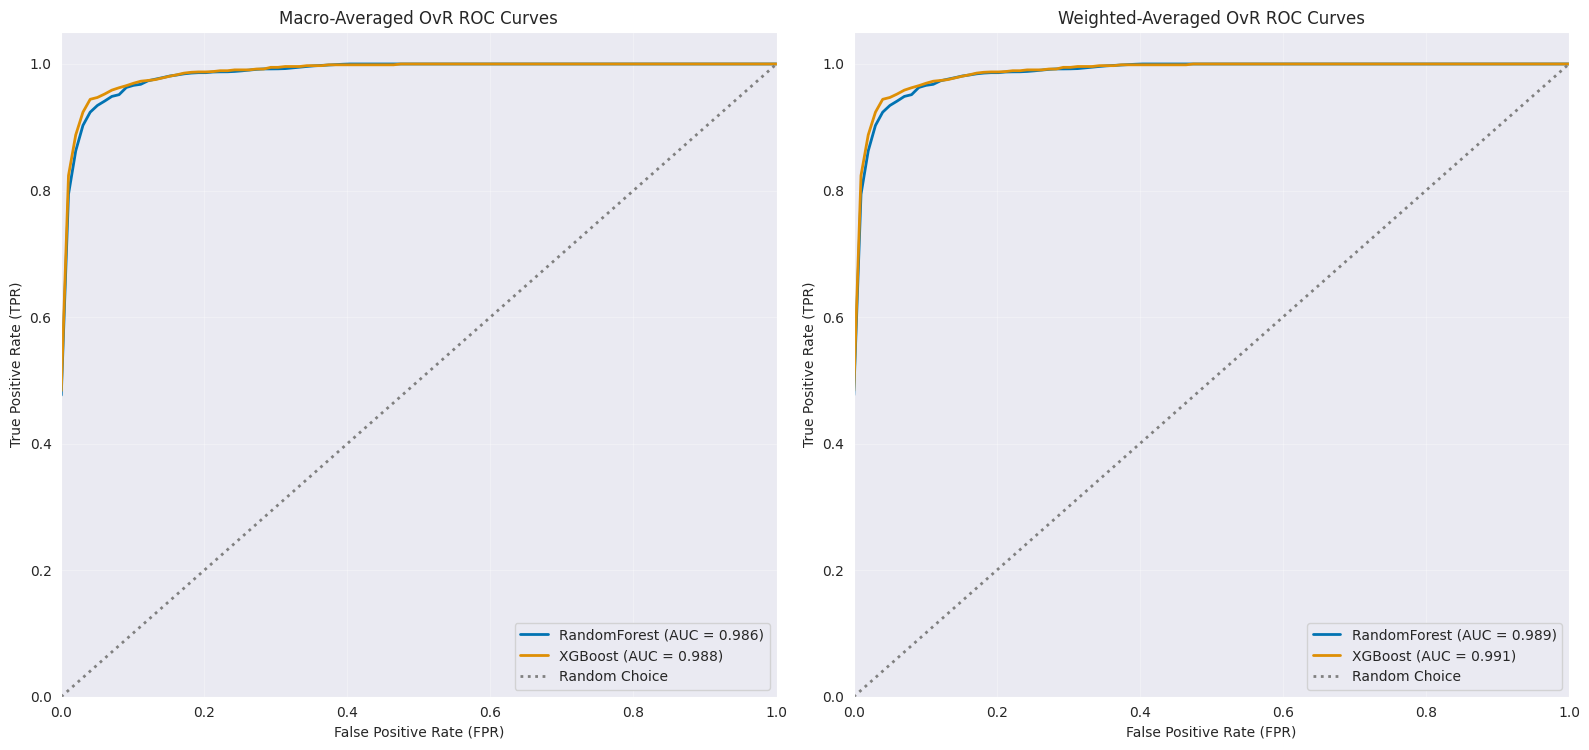

In [63]:
y_test_bin = label_binarize(Y_test, classes=[1, 2, 3, 4, 5, 7])
n_classes = y_test_bin.shape[1]

colors = sns.color_palette("colorblind", len(models) + 3)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

averages = ['macro', 'weighted']
titles = ['Macro-Averaged OvR ROC Curves', 'Weighted-Averaged OvR ROC Curves']

for ax, avg, title in zip(axes, averages, titles):
    for idx, (name, model) in enumerate(bonus_models.items()):
        fpr = dict()
        tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predicted_probs[name][:, i])

        # Interpolate mean TPR
        all_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes

        auc_value = roc_auc_score(
            y_test_bin, predicted_probs[name],
            average=avg, multi_class="ovr"
        )

        ax.plot(all_fpr, mean_tpr, lw=2, color=colors[idx],
                label=f'{name} (AUC = {auc_value:.3f})')

    # Random baseline
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle=':',
            label='Random Choice')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(title)
    ax.grid(alpha=0.3)

    # Add legend below each subplot
    ax.legend(loc='lower right')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


| Model               | Macro-Average AUC | Weighted-Average AUC |
|----------------------|-------------------|-----------------------|
| RandomForest         | 0.9864            | 0.9864                |
| XGBoost              | 0.9883            | 0.9883                |

- XGBoost and Random Forest classifier have a higher Macro-Averaged AUC than all the other models.
- Hence they are more robust and generalizable classifiers than the rest.

**E.1.3 PRC**

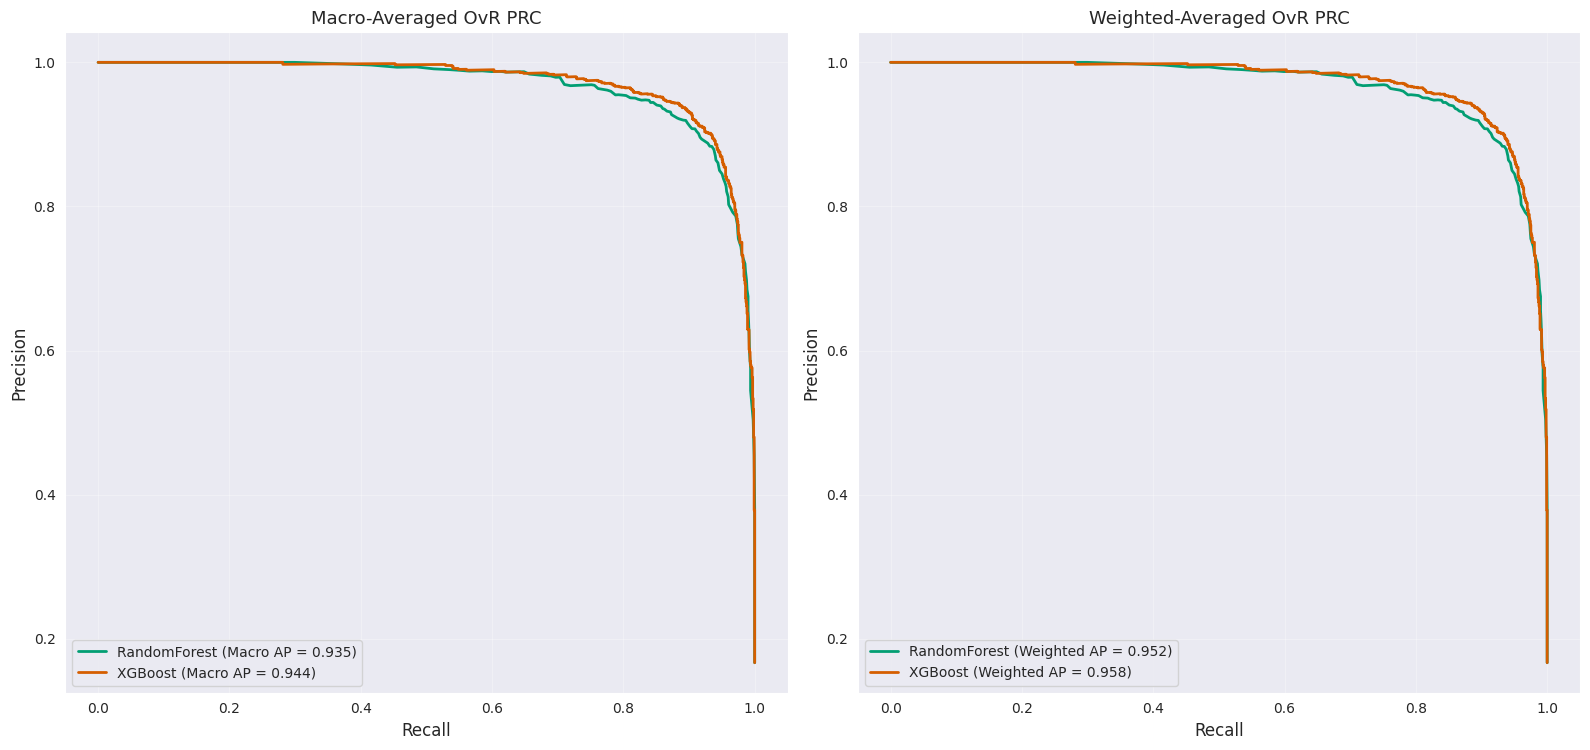

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
averages = ["macro", "weighted"]
titles = ["Macro-Averaged OvR PRC", "Weighted-Averaged OvR PRC"]

for ax, avg, title in zip(axes, averages, titles):
    for idx, (name, model) in enumerate(bonus_models.items()):
        # Compute per-class PRC
        precision = dict()
        recall = dict()
        ap_scores = []

        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(
                y_test_bin[:, i], predicted_probs[name][:, i]
            )
            ap_i = average_precision_score(
                y_test_bin[:, i], predicted_probs[name][:, i]
            )
            ap_scores.append(ap_i)

        # Macro/Weighted average precision
        ap_avg = average_precision_score(
            y_test_bin, predicted_probs[name], average=avg
        )

        # Flatten predictions for a smooth overall curve (visualization only)
        precision_avg, recall_avg, _ = precision_recall_curve(
            y_test_bin.ravel(), predicted_probs[name].ravel()
        )

        # Plot averaged PRC
        ax.plot(
            recall_avg,
            precision_avg,
            lw=2,
            color=colors[idx + 2],
            label=f"{name} ({avg.capitalize()} AP = {ap_avg:.3f})",
        )

    ax.set_xlabel("Recall", fontsize=12)
    ax.set_ylabel("Precision", fontsize=12)
    ax.set_title(title, fontsize=13)
    ax.grid(alpha=0.3)

    ax.legend(loc='lower left')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


| Model               | Macro-Average Precision | Weighted-Average Precision |
|----------------------|-----------|-----------|
| XGBoost        | 0.935    | 0.952 |
| SVC                  | 0.944    | 0.958 |

- XGBoost and Random Forest classifier have a higher Averaged Precision than all the other models.